Shape of X_1: (2062, 64, 64)
Shape of Y_1: (2062, 10)
Iteration: 0, Loss: 83.29567058602518, Accuracy: -2949.425287356322
Iteration: 1, Loss: 83.3274241219943, Accuracy: -2949.425287356322
Iteration: 2, Loss: 83.35836056548933, Accuracy: -2949.425287356322
Iteration: 3, Loss: 83.38849888626048, Accuracy: -2949.425287356322
Iteration: 4, Loss: 83.41786348394936, Accuracy: -2949.425287356322
Iteration: 5, Loss: 83.44648347970231, Accuracy: -2949.425287356322
Iteration: 6, Loss: 83.47439190458604, Accuracy: -2949.425287356322
Iteration: 7, Loss: 83.50162483662824, Accuracy: -2949.425287356322
Iteration: 8, Loss: 83.52822053474799, Accuracy: -2949.425287356322
Iteration: 9, Loss: 83.55421861073341, Accuracy: -2949.425287356322
Iteration: 10, Loss: 83.57965927114742, Accuracy: -2949.425287356322
Iteration: 11, Loss: 83.60458265097543, Accuracy: -2949.425287356322
Iteration: 12, Loss: 83.62902825114254, Accuracy: -2949.425287356322
Iteration: 13, Loss: 83.65303448356309, Accuracy: -2949.4252

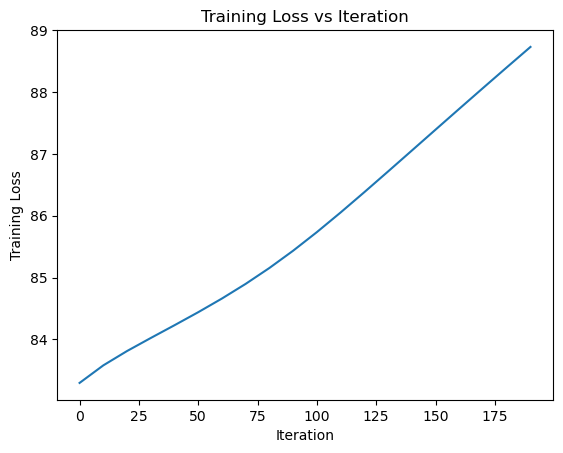

In [1]:
# complete these codes according to comments
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

X_1 = np.load("C:/Users/user/Desktop/machine learning/work/X.npy")
Y_1 = np.load("C:/Users/user/Desktop/machine learning/work/Y.npy")

# Display the shape of X_1 and Y_1
print('Shape of X_1:', X_1.shape)
print('Shape of Y_1:', Y_1.shape)

# Define the image size
im_size = 64

# Choose the sign for digits 0 and 1 and prepare the dataset accordingly
# Select signs for digits 0 and 1
X = np.concatenate((X_1[204:409], X_1[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)

# Split data into training and testing set (test_size=0.15, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Put into two dimensions
number_x_train = X_train.shape[0]
number_of_test = X_test.shape[0]

# Reshape the data
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

# TODO5: Transpose the OF X_train_flatten and X_test_flatten
x_train = X_train_flatten.T
x_test = X_test_flatten.T

# TODO6: Transpose the OF y_train and y_test
y_train = Y_train.T
y_test = Y_test.T
cp = 1e-15

# Define the model architecture
# Define the Dense Layer class
class Dense_layer:
    def __init__(self, inputs, neurons):
        self.weight = 0.1 * np.random.randn(neurons, inputs)
        self.bias = np.zeros((neurons, 1))

    def forward(self, inputdata):
        # TODO7: Implement forward pass through the model
        self.output = np.dot(self.weight, inputdata) + self.bias
        self.output = 1 / (1 + np.exp(-self.output))
        self.output = np.clip(self.output, cp, 1 - cp)
        return self.output

# Instanciate the the model Lyer
Layer1 = Dense_layer(x_train.shape[0], 3)
Layer2 = Dense_layer(3, y_train.shape[0])

# Define the Sigmoid Activation class
# TODO8: implement the activation with sigmoid function
class Sigmoid_Activation:
    def forward(self, inputs):
        inputs = np.clip(inputs, cp, 1 - cp)
        self.output = 1 / (1 + np.exp(-inputs))
        return self.output  # y = 1/(1+e)

class Loss:
    def loss_calculator(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred = np.clip(y_pred, cp, 1 - cp)
        if len(y_true.shape) == 1:
            confidences = y_pred[range(samples), y_true]
        elif len(y_true.shape) == 2:
            confidences = np.log(y_pred) * y_true
        confidences_log = -np.sum(confidences)
        loss = np.mean(confidences_log)
        self.out = loss

# Define the Model class for predicting one of zero
class Model:
    def predict(self, output, x_test):
        Y_prediction = np.zeros((1, x_test.shape[1]))
        for i in range(x_test.shape[1]):
            if output[0, i] <= 0.5:
                Y_prediction[0, i] = 0
            else:
                Y_prediction[0, i] = 1
        return Y_prediction

# TODO9: Initialize Activation, Loss, and Model
activation3 = Sigmoid_Activation()
loss_f = Loss()
Model = Model()

# Set learning parameters
learning_rate = 0.01
best_loss = float('inf')
epoch = 200
loss_list = []
loss_index = []

# Iterate through training process

for iteration in range(epoch):
    # TOD10: forward pass
    Layer1_output = Layer1.forward(x_train)
    Layer2_output = Layer2.forward(Layer1_output)
    activation3_output = activation3.forward(Layer2_output)

    # Calculate the loss
    Loss_value = loss_f.loss_calculator(activation3_output, y_train)
    current_loss = loss_f.out

    # Making prediction
    binary_predictions = Model.predict(activation3_output, y_train)

    # Update the loss
    grad_loss = activation3_output - y_train
    grad_layer_weight2 = np.dot(grad_loss, Layer1_output.T) / x_train.shape[1]
    grad_layer_bias2 = np.sum(grad_loss, axis=1, keepdims=True) / x_train.shape[1]
    glad_loss_output1_layer = np.dot(Layer2.weight.T, grad_loss) * (1 - np.power(Layer1_output, 2))
    grad_layer_weight1 = np.dot(glad_loss_output1_layer, x_train.T) / x_train.shape[1]
    grad_layer_bias1 = np.sum(glad_loss_output1_layer, axis=1, keepdims=True) / x_train.shape[1]

    # TODO11: Update weights and biases
    Layer2.weight -= learning_rate * grad_layer_weight2
    Layer2.bias -= learning_rate * grad_layer_bias2
    Layer1.weight -= learning_rate * grad_layer_weight1
    Layer1.bias -= learning_rate * grad_layer_bias1

    if current_loss < best_loss:
        best_loss = current_loss
        best_layer1_weight = Layer1.weight.copy()
        best_layer1_bias = Layer1.bias.copy()
        best_layer2_weight = Layer2.weight.copy()
        best_layer2_bias = Layer2.weight.copy()

    acc = 100 - np.mean(np.argmax(activation3_output, axis=1, keepdims=True) - y_train) * 100

    # TODO12: Display on the screen the following for the training epochs

    print(f'Iteration: {iteration}, Loss: {current_loss}, Accuracy: {acc}')

    if iteration % 10 == 0:
        loss_list.append(current_loss)
        loss_index.append(iteration)

# TODO13: Plot the training loss vs Iteration
plt.plot(loss_index, loss_list)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iteration')
plt.show()
